# Prétraitements élémentaires sur les images

In [15]:
# Importer les modules nécessaires
import cv2
import matplotlib.pyplot as plt

### <span style=color:green> Lecture et Propriétés d'images</span>

In [16]:
# Lire l'image ball
ball_bgr = cv2.imread("Images/ball.jpg", cv2.IMREAD_COLOR) # image de forme BGR

# Afficher le type de l'image ball
print(type(ball_bgr))

# Afficher le type de valeur des pixels
print(type(ball_bgr[0,0,1])) 

# Afficher sa Définition et le nombre de canaux (3 ici pour RGB)
print(f"hauteur, largeur, canaux : {ball_bgr.shape}")

# Calculer sa taille en Mo = Définition (en pixels) * profondeur (en bits par pixel)
hauteur = ball_bgr.shape[0] 
largeur = ball_bgr.shape[1]
profondeur = 24  # 3 canaux RGB pour 8 bits/pixels
taille_mo = (hauteur * largeur * profondeur) / (8*1024*1024) # conversion en Octets puis en Mo
print(f"La taille de l'image est : {taille_mo:.3f} Mo")


<class 'numpy.ndarray'>
<class 'numpy.uint8'>
hauteur, largeur, canaux : (427, 640, 3)
La taille de l'image est : 0.782 Mo


### <span style=color:green> Espaces de couleurs <span> 

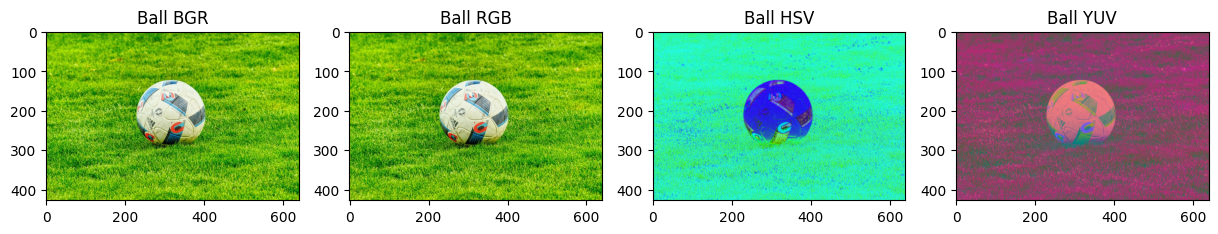

In [26]:
ball_rgb = cv2.cvtColor(ball_bgr, cv2.COLOR_BGR2RGB) # Espace RGB initial
ball_hsv = cv2.cvtColor(ball_bgr, cv2.COLOR_BGR2HSV) # Espace HSV
ball_yuv = cv2.cvtColor(ball_bgr, cv2.COLOR_BGR2YUV) # Espace YUV

# Afficher les différents espaces
plt.figure(figsize=[15,15])
plt.subplot(141); plt.imshow(ball_bgr[:,:,::-1], cmap='gray'); plt.title("Ball BGR")
plt.subplot(142); plt.imshow(ball_rgb, cmap='gray'); plt.title("Ball RGB")
plt.subplot(143); plt.imshow(ball_hsv, cmap='gray'); plt.title("Ball HSV")
plt.subplot(144); plt.imshow(ball_yuv, cmap='gray'); plt.title("Ball YUV")
plt.show()